In [34]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import datetime

df = pd.read_csv('Manaus.csv', sep=';', encoding='latin-1')

c:\users\luiz fabio\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (15,21,23,29,30,31,32,34) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [35]:
n = df.size

df

,_idade,_faixa etária,_sexo,_bairro,_classificacao,_comorb_renal,_comorb_diabetes,_comorb_imuno,_comorb_cardio,_conclusao,...,_comorb_neurologica,_comorb_hemato,_comorb_obessidade,_origem,_evolução,_teste_pcr,_teste_anticorpo,_teste_antigeno,_teste_igm,_teste_igg
0,37.0,30a - 39a,F,CIDADE NOVA,Confirmado,Não,Não,Não,Não,NaN,...,NaN,NaN,NaN,"eSUS VE,",NaN,1.0,0.0,0.0,0.0,0.0
1,30.0,30a - 39a,M,JAPIIM,Confirmado,Não,Não,Não,Não,NaN,...,NaN,NaN,NaN,"eSUS VE,",NaN,1.0,0.0,0.0,0.0,0.0
2,30.0,30a - 39a,M,FLORES,Confirmado,Não,Não,Não,Não,NaN,...,NaN,NaN,NaN,"eSUS VE,",NaN,1.0,0.0,0.0,0.0,0.0
3,54.0,50a - 59a,M,TANCREDO NEVES,Em análise,Não,Não,Não,Não,Recuperado,...,NaN,NaN,NaN,"eSUS VE,",NaN,0.0,0.0,0.0,0.0,0.0
4,43.0,40a - 49a,F,FLORES,Confirmado,Não,Não,Não,Não,NaN,...,NaN,NaN,NaN,"eSUS VE,",NaN,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113529,68.0,60a - 69a,M,NOVA ESPERANCA,Descartado,Não,Não,Não,Não,Recuperado,...,NaN,NaN,NaN,"SIVEP, eSUS VE, GAL",Internado,2.0,0.0,0.0,0.0,0.0
113530,46.0,40a - 49a,F,TANCREDO NEVES,Confirmado,Não,Sim,Não,Não,NaN,...,NaN,NaN,NaN,"SIVEP, eSUS VE, GAL",Em tratamento domiciliar,1.0,0.0,0.0,0.0,0.0
113531,15.0,15a - 19a,M,NOVA CIDADE,Descartado,Não,Não,Não,Não,NaN,...,Sim,Não,Não,"SIVEP, eSUS VE, GAL",Em tratamento domiciliar,1.0,1.0,0.0,0.0,0.0
113532,30.0,30a - 39a,M,COROADO,Descartado,Não,Não,Não,Não,Recuperado,...,Não,Não,Não,"SIVEP, eSUS VE, GAL",Em tratamento domiciliar,2.0,0.0,0.0,0.0,0.0


In [36]:
casos_confirmados = df.loc[df['_classificacao'] == 'Confirmado']

In [37]:
casos_confirmados_dt_notificao = casos_confirmados.filter(items=['_dt_notificacao'])

In [38]:
def verifica_data(data):
    d = int(data[0:2])
    m = int(data[3:5])
    y = int(data[6:])
    
    data = datetime.date(y, m, d)
    often10days  = datetime.date(2020, 8, 3)
    
    return often10days<=data

In [39]:
for i in range (n):
    try:
        if(not(verifica_data(casos_confirmados_dt_notificao['_dt_notificacao'][i]))):
            casos_confirmados_dt_notificao['_dt_notificacao'][i] = 'Invalido'
    except:
        continue

In [40]:
ultimos10dias = casos_confirmados_dt_notificao.loc[casos_confirmados_dt_notificao['_dt_notificacao'] != 'Invalido']

In [41]:
ultimos10dias

,_dt_notificacao
84,03/08/2020
206,07/08/2020
489,11/08/2020
857,03/08/2020
872,07/08/2020
...,...
112618,09/08/2020
112622,07/08/2020
112627,09/08/2020
113413,06/08/2020


In [42]:
ultimos10dias = ultimos10dias['_dt_notificacao'].value_counts()
ultimos10dias.sort_values()

09/08/2020     11
12/08/2020     23
08/08/2020     83
04/08/2020    265
06/08/2020    273
05/08/2020    303
03/08/2020    304
07/08/2020    318
11/08/2020    352
10/08/2020    447
Name: _dt_notificacao, dtype: int64

In [43]:
datas = ultimos10dias.index
casos = ultimos10dias.values

list_of_tuples = list(zip(datas, casos))  

datas_casos = pd.DataFrame(list_of_tuples, columns = ['Datas', 'Casos'])

display(datas_casos)

,Datas,Casos
0,10/08/2020,447
1,11/08/2020,352
2,07/08/2020,318
3,03/08/2020,304
4,05/08/2020,303
5,06/08/2020,273
6,04/08/2020,265
7,08/08/2020,83
8,12/08/2020,23
9,09/08/2020,11


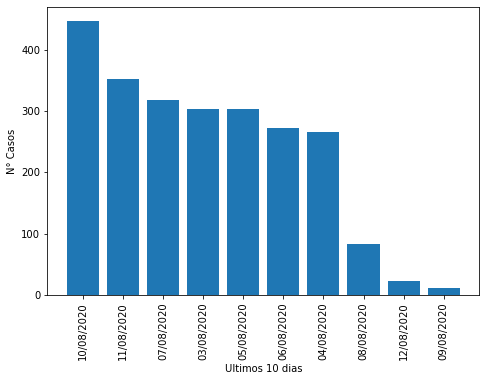

In [44]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(datas_casos['Datas'], datas_casos['Casos'])
ax.set_xlabel('Ultimos 10 dias')
ax.set_ylabel('N° Casos')
plt.xticks(datas_casos['Datas'],rotation=90)
plt.show()